In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

In [2]:
sys.path.append("../")

In [3]:
from nupyk import sedreader, datahandler, utils

In [4]:
TXS_reader = sedreader.SEDReader("../data/SED_14.22_77.3582_5.6932_TXS0506+056_nan")

In [5]:
TXS_reader.dataframe.head()

,freq,flux,flux_plus,flux_min,cat
0,1.400000e+09,7.503000e-15,7.728000e-15,7.277000e-15,NVSS
1,2.418000e+17,4.158000e-13,5.494000e-13,2.821000e-13,RASS
2,2.418000e+17,3.539000e-13,4.157000e-13,2.921000e-13,OUSXB
5,7.253000e+17,3.950000e-13,4.640000e-13,3.260000e-13,OUSXB
6,1.088000e+18,4.524000e-13,5.893000e-13,3.155000e-13,OUSXB


In [6]:
sed_path_list = ["../data/"]

In [7]:
reader = datahandler.DataReader(sed_path_list)

Reading files: 100%|██████████| 1/1 [00:00<00:00, 70.32it/s]


In [8]:
reader.save()

In [9]:
handler = datahandler.DataHandler(sed_path_list)

Processing files: 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]


In [10]:
raw_df = handler.raw_dataframe

In [11]:
processed_df = handler.processed_dataframe

In [12]:
processed_df.head()

,name,dec,ra,nu_peak,redshift,radio_freq_mean,radio_flux_mean,radio_flux_std,radio_flux_min,radio_flux_max,...,optical_freq_max,optical_freq_count,X_freq_std,X_freq_min,X_freq_max,X_freq_count,gamma_freq_std,gamma_freq_min,gamma_freq_max,gamma_freq_count
0,TXS0506+056,5.6932,77.3582,14.22,NaN,1.438682e+11,3.026979e-13,3.287399e-13,0.0,1.222000e-12,...,8.563000e+14,12.0,3.062534e+17,1.138000e+15,1.451000e+18,228.0,6.405844e+25,36500000.0,2.614000e+26,30.0


In [13]:
handler.save()

In [14]:
handler.save_raw()

In [16]:
TXS_processed = processed_df.iloc[0]

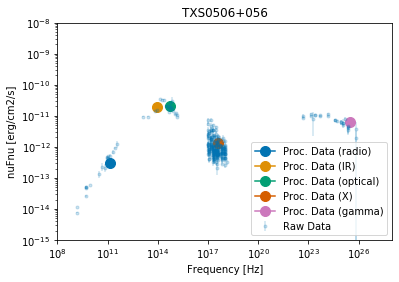

In [17]:
fig, ax = plt.subplots()
ax = utils.SEDReaderSourcePlot(ax, TXS_reader).ax
ax = utils.ProcessedSourcePlot(ax, TXS_processed, handler.frequency_bins_names).ax
ax.legend()